<a href="https://colab.research.google.com/github/Calex192/Desafio-Telecom-X-parte-2.-Alura-Latam./blob/main/Telecom_part2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracci√≥n del Archivo Tratado.**

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/Calex192/Desafio-Telecom-X-parte-2.-Alura-Latam./refs/heads/main/datos_tratados.csv"
df = pd.read_csv(url)
df.head()

churn  gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
0      0       0              0        1           1       9             1   
1      0       1              0        0           0       9             1   
2      1       1              0        0           0       4             1   
3      1       1              1        1           0      13             1   
4      1       0              1        1           0       3             1   

  multiplelines internetservice onlinesecurity  ... deviceprotection  \
0            no             dsl             no  ...               no   
1           yes             dsl             no  ...               no   
2            no     fiber optic             no  ...              yes   
3            no     fiber optic             no  ...              yes   
4            no     fiber optic             no  ...               no   

  techsupport streamingtv streamingmovies        contract paperlessbilling  \
0         yes         yes              no        one year                1   
1          no          no             yes  month-to-month                0   
2          no          no              no  month-to-month                1   
3          no         yes             yes  month-to-month                1   
4         yes         yes              no  month-to-month                1   

      paymentmethod charges.monthly  charges.total  cuentas_diarias  
0      mailed check            65.6         593.30         2.186667  
1      mailed check            59.9         542.40         1.996667  
2  electronic check            73.9         280.85         2.463333  
3  electronic check            98.0        1237.85         3.266667  
4      mailed check            83.9         267.40         2.796667  

[5 rows x 21 columns]

In [4]:
df.describe()

churn       gender  seniorcitizen      partner   dependents  \
count  7032.000000  7032.000000    7032.000000  7032.000000  7032.000000   
mean      0.265785     0.504693       0.162400     0.482509     0.298493   
std       0.441782     0.500014       0.368844     0.499729     0.457629   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000     1.000000       0.000000     0.000000     0.000000   
75%       1.000000     1.000000       0.000000     1.000000     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  phoneservice  paperlessbilling  charges.monthly  \
count  7032.000000   7032.000000       7032.000000      7032.000000   
mean     32.421786      0.903299          0.592719        64.798208   
std      24.545260      0.295571          0.491363        30.085974   
min       1.000000      0.000000          0.000000        18.250000   
25%       9.000000      1.000000          0.000000        35.587500   
50%      29.000000      1.000000          1.000000        70.350000   
75%      55.000000      1.000000          1.000000        89.862500   
max      72.000000      1.000000          1.000000       118.750000   

       charges.total  cuentas_diarias  
count    7032.000000      7032.000000  
mean     2283.300441         2.159940  
std      2266.771362         1.002866  
min        18.800000         0.608333  
25%       401.450000         1.186250  
50%      1397.475000         2.345000  
75%      3794.737500         2.995417  
max      8684.800000         3.958333

In [5]:
df.dtypes

churn                 int64
gender                int64
seniorcitizen         int64
partner               int64
dependents            int64
tenure                int64
phoneservice          int64
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling      int64
paymentmethod        object
charges.monthly     float64
charges.total       float64
cuentas_diarias     float64
dtype: object

In [6]:
df.isnull().sum()

churn               0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
charges.monthly     0
charges.total       0
cuentas_diarias     0
dtype: int64

# **An√°lisis Dirigido.**

**Distribuci√≥n de tenure seg√∫n churn.**

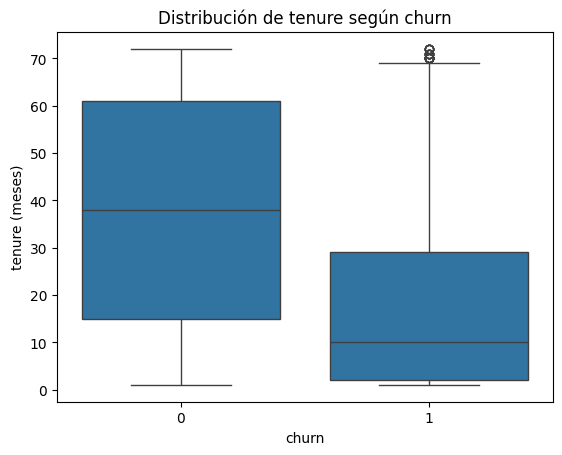

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de tenure vs churn
sns.boxplot(x='churn', y='tenure', data=df)
plt.title('Distribuci√≥n de tenure seg√∫n churn')
plt.xlabel('churn')
plt.ylabel('tenure (meses)')
plt.show()


Resultado: a menor cantidad de tiempo contratado, mayor es la tasa de cancelaci√≥n.

**Distribuci√≥n de charges.total seg√∫n churn.**

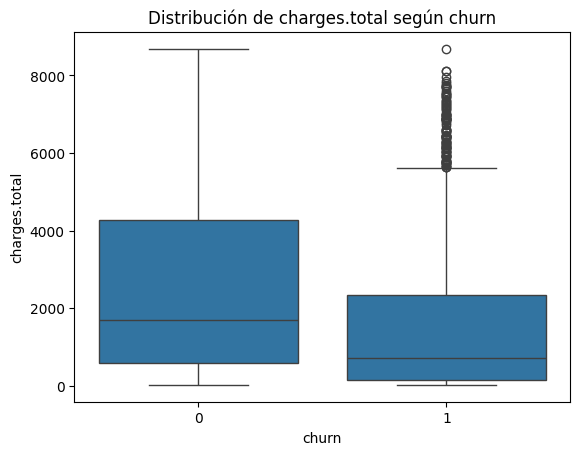

In [8]:
sns.boxplot(x='churn', y='charges.total', data=df)
plt.title('Distribuci√≥n de charges.total seg√∫n churn')
plt.xlabel('churn')
plt.ylabel('charges.total')
plt.show()


Resultado: clientes con menores gastos tienden a la cancelaci√≥n.

**Relaci√≥n entre tenure y charges.total seg√∫n churn.**

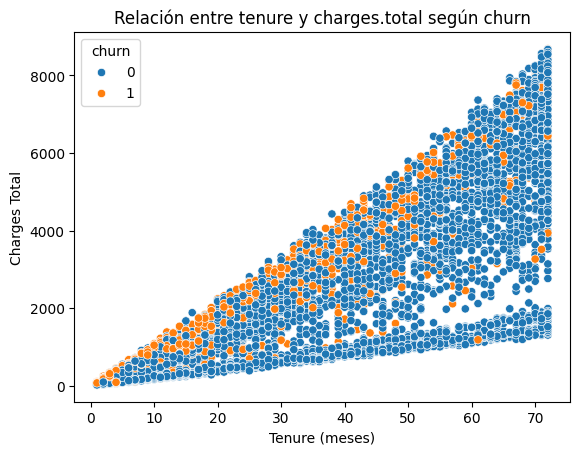

In [9]:
sns.scatterplot(x='tenure', y='charges.total', hue='churn', data=df)
plt.title('Relaci√≥n entre tenure y charges.total seg√∫n churn')
plt.xlabel('Tenure (meses)')
plt.ylabel('Charges Total')
plt.show()

Se observa una relaci√≥n casi lineal entre el tenure y los charges.total: mientras m√°s tiempo permanece un cliente, mayor es el gasto acumulado. Esto tiene sentido, ya que a m√°s meses contratados, m√°s dinero pagan.
El churn ocurre mayormente en clientes nuevos o de corto plazo (menos de 2‚Äì3 a√±os).
La fidelizaci√≥n aumenta significativamente con el tiempo, es decir, mientras m√°s meses permanece un cliente, menor es la probabilidad de que se d√© de baja.

# **An√°lisis de Correlaci√≥n**

In [10]:
#Copiar el DataFrame original para no da√±ar la versi√≥n base
df_clean = df.copy()

In [11]:
#One-hot encoding para variables categ√≥ricas con m√°s de 2 categor√≠as
categorical_cols = df_clean.select_dtypes(include=['object']).columns
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

In [12]:
#Matriz de correlaci√≥n con churn
correlacion = df_clean.corr()
#Correlaci√≥n de todas las variables con churn
churn_corr = correlacion['churn'].sort_values(ascending=False)

print("Variables m√°s correlacionadas con Churn:")
print(churn_corr.head(14))

Variables m√°s correlacionadas con Churn:
churn                             1.000000
internetservice_fiber optic       0.307463
paymentmethod_electronic check    0.301455
cuentas_diarias                   0.192858
charges.monthly                   0.192858
paperlessbilling                  0.191454
seniorcitizen                     0.150541
streamingtv_yes                   0.063254
streamingmovies_yes               0.060860
multiplelines_yes                 0.040033
phoneservice                      0.011691
gender                           -0.008545
multiplelines_no phone service   -0.011691
deviceprotection_yes             -0.066193
Name: churn, dtype: float64


In [13]:
vars_relacionadas = churn_corr.head(14).index.tolist()
print(vars_relacionadas)

['churn', 'internetservice_fiber optic', 'paymentmethod_electronic check', 'cuentas_diarias', 'charges.monthly', 'paperlessbilling', 'seniorcitizen', 'streamingtv_yes', 'streamingmovies_yes', 'multiplelines_yes', 'phoneservice', 'gender', 'multiplelines_no phone service', 'deviceprotection_yes']


In [14]:
X_corr = df_clean[vars_relacionadas]  # Variables independientes seleccionadas
y = df_clean['churn']  # Variable objetivo

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_corr)

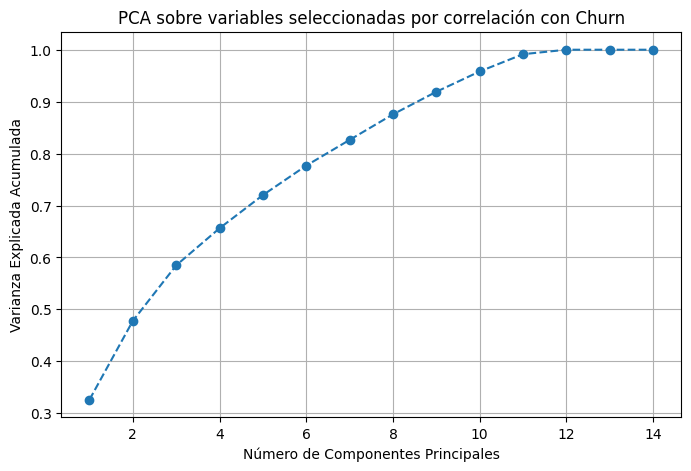

In [29]:
from sklearn.decomposition import PCA

# Inicializamos PCA sin l√≠mite de componentes
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Graficamos
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('N√∫mero de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('PCA sobre variables seleccionadas por correlaci√≥n con Churn')
plt.grid()
plt.show()

Conclusi√≥n: con 14 elementos obtenemos cerca de 90% de correlaci√≥n con churn.

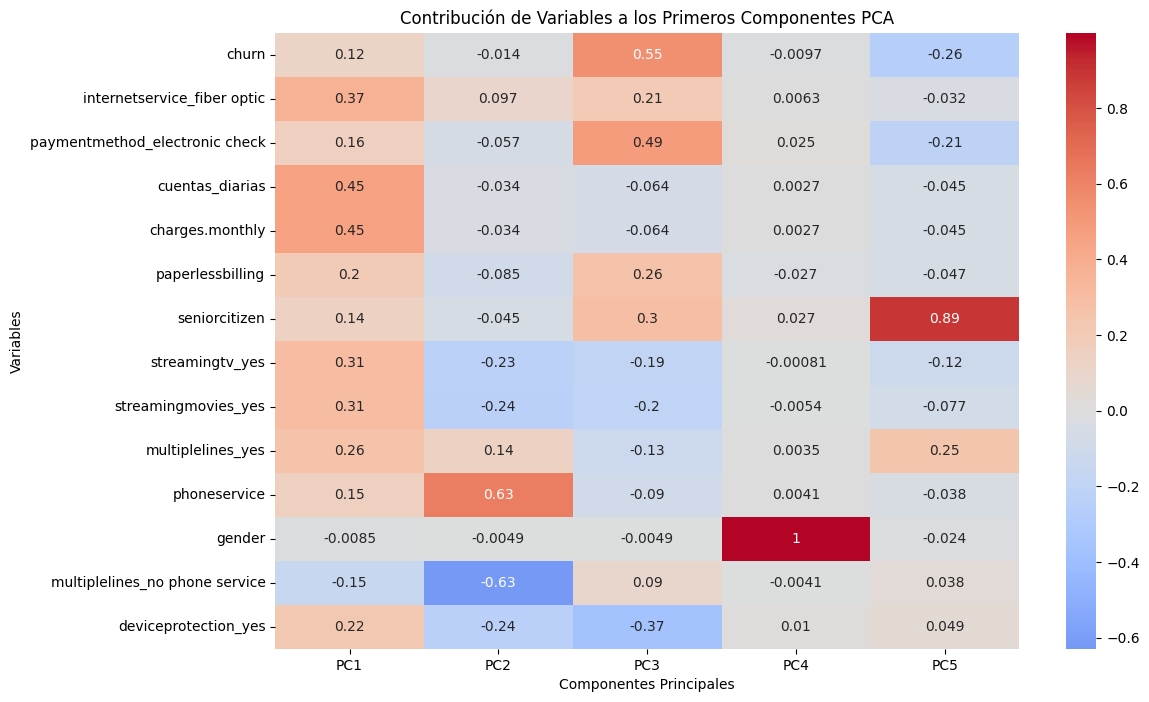

In [30]:
import numpy as np
import seaborn as sns


# Seleccionar las 14 variables m√°s correlacionadas con churn
vars_relacionadas = churn_corr.head(14).index.tolist()
X_corr = df_clean[vars_relacionadas]

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_corr)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Matriz de cargas
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=vars_relacionadas
)

# Graficar el "heatmap" de cargas
plt.figure(figsize=(12, 8))
sns.heatmap(loadings.iloc[:, :5], annot=True, cmap="coolwarm", center=0)  # primeras 5 componentes
plt.title("Contribuci√≥n de Variables a los Primeros Componentes PCA")
plt.ylabel("Variables")
plt.xlabel("Componentes Principales")
plt.show()

**Resultados**
El color indica la fuerza y direcci√≥n de la correlaci√≥n:

üî¥ Rojo = correlaci√≥n positiva (a mayor valor de la variable, mayor probabilidad de churn).

üîµ Azul = correlaci√≥n negativa (a mayor valor de la variable, menor probabilidad de churn).

Los n√∫meros dentro de cada celda son los coeficientes de correlaci√≥n.

El churn est√° en la primera fila, y se ve c√≥mo se relaciona con las dem√°s variables.

1. Variables m√°s relacionadas con churn

internetservice_fiber optic (0.37)
Los clientes con fibra √≥ptica tienen m√°s probabilidad de churn que los que usan otro tipo de servicio.

charges.monthly (0.45) y cuentas_diarias (0.45)
El costo mensual y el n√∫mero de cuentas diarias tienen una fuerte relaci√≥n positiva con churn ‚Üí clientes que pagan m√°s tienden a irse.

streamingtv_yes (0.31) y streamingmovies_yes (0.31)
Tener servicios de streaming tambi√©n est√° asociado con mayor churn.

multiplelines_yes (0.26)
Tener m√∫ltiples l√≠neas de tel√©fono aumenta ligeramente la probabilidad de churn.

paperlessbilling (0.20) y paymentmethod_electronic check (0.16)
Facturaci√≥n electr√≥nica y pago con cheque electr√≥nico tambi√©n tienen relaci√≥n positiva con churn.

seniorcitizen (0.14)
Los adultos mayores muestran una correlaci√≥n positiva, aunque m√°s d√©bil, con churn.

2. Variables con correlaci√≥n negativa (protegen contra churn)

deviceprotection_yes (-0.24)
Tener protecci√≥n de dispositivos reduce la probabilidad de churn.

streamingmovies_yes y streamingtv_yes tambi√©n tienen componentes negativos en otras dimensiones (cuando se cruzan con PCA).

multiplelines_no phone service (-0.15)
No tener servicio de tel√©fono se asocia con menor churn. Algunas combinaciones con seniorcitizen y phone service muestran correlaci√≥n negativa (cuando se cruzan con PCA).

Conclusi√≥n:

El churn est√° m√°s asociado a clientes con fibra √≥ptica, cargos mensuales altos y servicios adicionales como streaming.
En cambio, los clientes con protecci√≥n de dispositivos o sin l√≠neas m√∫ltiples tienden a quedarse.
Variables como g√©nero o phone service tienen correlaci√≥n casi nula no aportan mucho para predecir churn.

**Variables sleccionadas para el an√°lisis.**

In [31]:
vars_seleccionadas = ['churn',
 'gender',
 'paymentmethod_electronic check',
 'charges.monthly',
 'paperlessbilling',
 'seniorcitizen',
 'streamingtv_yes',
 'streamingmovies_yes',
 'multiplelines_yes',
 'phoneservice',
 'gender',
 'multiplelines_no phone service',
 'deviceprotection_yes']

# **Eliminaci√≥n de columnas irrelevantes para el an√°lisis.**

In [19]:
df_filtrado = df_clean[vars_seleccionadas].copy()
print("Shape original:", df_clean.shape)
print("Shape reducido:", df_filtrado.shape)
df_filtrado.head()

Shape original: (7032, 32)
Shape reducido: (7032, 13)


churn  gender  paymentmethod_electronic check  charges.monthly  \
0      0       0                           False             65.6   
1      0       1                           False             59.9   
2      1       1                            True             73.9   
3      1       1                            True             98.0   
4      1       0                           False             83.9   

   paperlessbilling  seniorcitizen  streamingtv_yes  streamingmovies_yes  \
0                 1              0             True                False   
1                 0              0            False                 True   
2                 1              0            False                False   
3                 1              1             True                 True   
4                 1              1             True                False   

   multiplelines_yes  phoneservice  gender  multiplelines_no phone service  \
0              False             1       0                           False   
1               True             1       1                           False   
2              False             1       1                           False   
3              False             1       1                           False   
4              False             1       0                           False   

   deviceprotection_yes  
0                 False  
1                 False  
2                  True  
3                  True  
4                 False

**Creaci√≥n de segunda variable que contenga a tenure:** aunque tenure no se encuentre presente en nuestra de correlaci√≥n, es necesario para la creaci√≥n de modelos predictivos que esta informaci√≥n sea incluida.

In [33]:
vars_seleccionadast = ['churn', 'tenure',
 'gender',
 'paymentmethod_electronic check',
 'charges.monthly',
 'paperlessbilling',
 'seniorcitizen',
 'streamingtv_yes',
 'streamingmovies_yes',
 'multiplelines_yes',
 'phoneservice',
 'gender',
 'multiplelines_no phone service',
 'deviceprotection_yes']
df_f = df_clean[vars_seleccionadast]

# **Normalizaci√≥n.**

In [34]:
# Si algunas son True/False
df_filtrado = df_filtrado.astype(int)   # convierte True=1, False=0
df_f = df_clean.astype(int)

# **Verificaci√≥n de la proporci√≥n de cancelaci√≥n (Churn).**


Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Churn):
calcula la proporci√≥n de clientes que cancelaron en relaci√≥n con los que permanecieron activos. Eval√∫a si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el an√°lisis de los resultados.

In [35]:
resumen = df_filtrado['churn'].value_counts().to_frame('Conteo')
resumen['Proporci√≥n'] = df_filtrado['churn'].value_counts(normalize=True)
print(resumen)

       Conteo  Proporci√≥n
churn                    
0        5163    0.734215
1        1869    0.265785


La mayor√≠a de los clientes se quedan activos (73%).
Aproximadamente 1 de cada 4 clientes cancela (27%).
Esto quiere decir que:
No es un desbalance extremo,
pero s√≠ hay cierto desbalance (la clase positiva "churn" es minoritaria).

# **Modelos predictivos.**

**Modelo predictivo con Random Forest.**

El modelo implementado corresponde a un Random Forest con balanceo de clases, entrenado con un 70% de los datos y evaluado en el 30% restante. Se calcularon m√©tricas de desempe√±o como Accuracy, F1-Score, matriz de confusi√≥n y reporte de clasificaci√≥n. Adem√°s, se incluy√≥ un mecanismo de diagn√≥stico que permite identificar autom√°ticamente si el modelo presenta overfitting, underfitting o una generalizaci√≥n adecuada.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

X = df_filtrado.drop("churn", axis=1)
y = df_filtrado["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42
)


rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train, average="weighted")
f1_test = f1_score(y_test, y_pred_test, average="weighted")

print(" Resultados del modelo Random Forest (Reducida Complejidad)")
print(f"Accuracy Train: {acc_train:.2f}, F1 Train: {f1_train:.2f}")
print(f"Accuracy Test:  {acc_test:.2f}, F1 Test:  {f1_test:.2f}")

print("\nMatriz de confusi√≥n (Test):")
print(confusion_matrix(y_test, y_pred_test))

print("\nReporte de Clasificaci√≥n (Test):")
print(classification_report(y_test, y_pred_test))


print("\n Diagn√≥stico del modelo:")
if acc_train - acc_test > 0.15:
    print(" El modelo presenta **Overfitting** (entrena muy bien pero generaliza mal).")
elif acc_train < 0.70 and acc_test < 0.70:
    print(" El modelo presenta **Underfitting** (no logra aprender bien los patrones).")
else:
    print(" El modelo est√° **bien generalizado** (buen equilibrio entre train y test).")

 Resultados del modelo Random Forest (Reducida Complejidad)
Accuracy Train: 0.75, F1 Train: 0.76
Accuracy Test:  0.70, F1 Test:  0.72

Matriz de confusi√≥n (Test):
[[1106  443]
 [ 182  379]]

Reporte de Clasificaci√≥n (Test):
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1549
           1       0.46      0.68      0.55       561

    accuracy                           0.70      2110
   macro avg       0.66      0.69      0.66      2110
weighted avg       0.75      0.70      0.72      2110


 Diagn√≥stico del modelo:
 El modelo est√° **bien generalizado** (buen equilibrio entre train y test).


Conclusi√≥n: el modelo Random Forest con complejidad reducida presenta un desempe√±o balanceado y buena generalizaci√≥n, con m√©tricas de entrenamiento y prueba relativamente cercanas (Accuracy 0.75 y 0.70, F1 0.76 y 0.72). La clase mayoritaria mantiene buena precisi√≥n y recall, mientras que la clase minoritaria mejora su detecci√≥n aunque con menor precisi√≥n. En conjunto, el modelo logra un equilibrio adecuado entre aprendizaje y generalizaci√≥n, sin indicios de overfitting.

**Random Forest con la variable tenure.**

In [46]:
X = df_f.drop("churn", axis=1)
y = df_f["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train, average="weighted")
f1_test = f1_score(y_test, y_pred_test, average="weighted")

print(" Resultados del modelo Random Forest (Reducida Complejidad)")
print(f"Accuracy Train: {acc_train:.2f}, F1 Train: {f1_train:.2f}")
print(f"Accuracy Test:  {acc_test:.2f}, F1 Test:  {f1_test:.2f}")

print("\nMatriz de confusi√≥n (Test):")
print(confusion_matrix(y_test, y_pred_test))

print("\nReporte de Clasificaci√≥n (Test):")
print(classification_report(y_test, y_pred_test))

print("\n Diagn√≥stico del modelo:")
if acc_train - acc_test > 0.15:
    print(" El modelo presenta **Overfitting** (entrena muy bien pero generaliza mal).")
elif acc_train < 0.70 and acc_test < 0.70:
    print(" El modelo presenta **Underfitting** (no logra aprender bien los patrones).")
else:
    print(" El modelo est√° **bien generalizado** (buen equilibrio entre train y test).")



 Resultados del modelo Random Forest (Reducida Complejidad)
Accuracy Train: 0.80, F1 Train: 0.80
Accuracy Test:  0.76, F1 Test:  0.77

Matriz de confusi√≥n (Test):
[[1193  356]
 [ 158  403]]

Reporte de Clasificaci√≥n (Test):
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1549
           1       0.53      0.72      0.61       561

    accuracy                           0.76      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.76      0.77      2110


 Diagn√≥stico del modelo:
 El modelo est√° **bien generalizado** (buen equilibrio entre train y test).


Conclusi√≥n: el modelo Random Forest con complejidad reducida mostr√≥ un buen desempe√±o y generalizaci√≥n, con m√©tricas de entrenamiento y prueba cercanas (Accuracy 0.80 y 0.76, F1 0.80 y 0.77). La clase mayoritaria se clasifica con alta precisi√≥n, mientras que la clase minoritaria presenta mejoras en detecci√≥n. En conjunto, el modelo logra un equilibrio adecuado entre aprendizaje y generalizaci√≥n, mitigando el overfitting.

**Modelo predictivo con KNN.**


Se cre√≥ un modelo predictivo KNN para churn, usando SMOTE para balancear la clase minoritaria y weights='distance' para dar m√°s importancia a vecinos cercanos. Se optimiz√≥ n_neighbors con GridSearchCV usando F1-score de churn como m√©trica, entrenando con 70% de los datos y evaluando con 30%.

In [47]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

knn_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(weights='distance'))
])

param_grid = {'knn__n_neighbors': list(range(5, 31, 2))}  # 5,7,...,29

grid_search = GridSearchCV(knn_pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_knn = grid_search.best_estimator_
print(f"Mejor n_neighbors: {grid_search.best_params_['knn__n_neighbors']}")


y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"Accuracy Train: {accuracy_train:.2f}, F1 Train: {f1_train:.2f}")
print(f"Accuracy Test: {accuracy_test:.2f}, F1 Test: {f1_test:.2f}")

print("\nMatriz de confusi√≥n Test:")
print(confusion_matrix(y_test, y_test_pred))
print("\nReporte de clasificaci√≥n Test:")
print(classification_report(y_test, y_test_pred))

def check_over_under_fit(acc_train, f1_train, acc_test, f1_test, threshold=0.1):
    acc_diff = acc_train - acc_test
    f1_diff = f1_train - f1_test

    if acc_train > 0.8 and acc_diff > threshold:
        print(" Posible OVERFITTING: el modelo se ajusta demasiado al entrenamiento")
    elif acc_test < 0.65 and f1_test < 0.5:
        print(" Posible UNDERFITTING: el modelo no aprende suficiente de los datos")
    else:
        print(" El modelo parece bien ajustado: buen balance entre entrenamiento y prueba")

check_over_under_fit(accuracy_train, f1_train, accuracy_test, f1_test)




Mejor n_neighbors: 29
Accuracy Train: 1.00, F1 Train: 0.99
Accuracy Test: 0.70, F1 Test: 0.54

Matriz de confusi√≥n Test:
[[1098  451]
 [ 184  377]]

Reporte de clasificaci√≥n Test:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1549
           1       0.46      0.67      0.54       561

    accuracy                           0.70      2110
   macro avg       0.66      0.69      0.66      2110
weighted avg       0.75      0.70      0.71      2110

 Posible OVERFITTING: el modelo se ajusta demasiado al entrenamiento


El modelo K-Nearest Neighbors (K=29) muestra un desempe√±o muy alto en el conjunto de entrenamiento (Accuracy 1.00, F1 0.99) pero considerablemente menor en el conjunto de prueba (Accuracy 0.70, F1 0.54), lo que indica overfitting. La clase mayoritaria se clasifica con buena precisi√≥n, mientras que la clase minoritaria presenta dificultades en la detecci√≥n, reflejando que el modelo aprendi√≥ demasiado los patrones del entrenamiento y tiene limitada capacidad de generalizaci√≥n.

**Modelo predictivo con la variable tenure.**

In [49]:
from sklearn.decomposition import PCA

knn_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [5, 7, 9, 11, 13, 15],
    'knn__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn_pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print(f"Mejor n_neighbors: {grid_search.best_params_['knn__n_neighbors']}")
print(f"Mejor weight: {grid_search.best_params_['knn__weights']}")


y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

print("\n--- Evaluaci√≥n en Entrenamiento ---")
print(f"Accuracy Train: {accuracy_score(y_train, y_train_pred):.2f}, F1 Train: {f1_score(y_train, y_train_pred):.2f}")

print("\n--- Evaluaci√≥n en Prueba ---")
print(f"Accuracy Test: {accuracy_score(y_test, y_test_pred):.2f}, F1 Test: {f1_score(y_test, y_test_pred):.2f}")

print("\n--- Matriz de Confusi√≥n ---")
print(confusion_matrix(y_test, y_test_pred))

print("\n--- Reporte de Clasificaci√≥n ---")
print(classification_report(y_test, y_test_pred))


Mejor n_neighbors: 15
Mejor weight: uniform

--- Evaluaci√≥n en Entrenamiento ---
Accuracy Train: 0.75, F1 Train: 0.62

--- Evaluaci√≥n en Prueba ---
Accuracy Test: 0.71, F1 Test: 0.56

--- Matriz de Confusi√≥n ---
[[1117  432]
 [ 176  385]]

--- Reporte de Clasificaci√≥n ---
              precision    recall  f1-score   support

           0       0.86      0.72      0.79      1549
           1       0.47      0.69      0.56       561

    accuracy                           0.71      2110
   macro avg       0.67      0.70      0.67      2110
weighted avg       0.76      0.71      0.73      2110



Conclusi√≥n: el modelo K-Nearest Neighbors (K=15, peso uniforme) muestra un desempe√±o equilibrado y buena generalizaci√≥n, con m√©tricas de entrenamiento y prueba relativamente cercanas (Accuracy 0.75 y 0.71, F1 0.62 y 0.56). La clase mayoritaria se clasifica con buena precisi√≥n y recall, mientras que la clase minoritaria mantiene una detecci√≥n aceptable pero con menor F1. En conjunto, el modelo logra un equilibrio razonable entre aprendizaje y generalizaci√≥n, sin signos evidentes de overfitting.

 Conclusi√≥n pr√°ctica:
Este modelo con n_neighbors=15 y weights=uniform es m√°s equilibrado.

Sacrific√≥ un poco de ‚Äúprecisi√≥n absoluta‚Äù, pero gan√≥ capacidad de generalizaci√≥n.

Adem√°s, mejor√≥ la detecci√≥n de clientes que abandonan (recall = 0.69), lo que es valioso en un problema de churn donde suele ser m√°s costoso no detectar a un cliente en riesgo que tener un falso positivo.


El modelo con tenure es superior porque generaliza mejor, reduce overfitting y mejora la detecci√≥n de churners (clase 1).

Aunque baja el desempe√±o en entrenamiento, en la pr√°ctica funciona mejor en datos nuevos, que es lo realmente importante.

En pocas palabras: incluir la variable tenure hace al modelo m√°s confiable y √∫til para predecir churn.

# **Conclusi√≥n.**

Las variables m√°s influyentes (seg√∫n correlaciones/selecci√≥n de variables mostradas) son: m√©todo de pago ‚Äúelectronic check‚Äù, charges.monthly (cargos mensuales), paperlessbilling, fiber optic en InternetService, tenure (antig√ºedad), ausencia de tech/online security (an√°logo por familia de variables), contract de mes a mes (impl√≠cito por patr√≥n de churn), adem√°s de streamingtv_yes/streamingmovies_yes, multiplelines_no phone service, deviceprotection_yes, seniorcitizen, gender. Fuera de la matriz de correlaci√≥n se incluye el tiempo que las personas han permanecido en la compa√±ia porque a mayor cantidad de tiempo, este funciona como una medida de protecci√≥n contra la cancelaci√≥n de servicios. El riesgo de churn es mayor en clientes de contrato mes a mes, con cargos mensuales altos, que pagan por ‚Äúelectronic check‚Äù y con facturaci√≥n sin papel, y menor en clientes con mayor antig√ºedad y contratos m√°s largos.

**Rendimiento de los modelos predictivos:**

**1. Random Forest (Complejidad reducida):**

Diagn√≥stico: la salida describe al modelo como ‚Äúbien generalizado‚Äù (buen equilibrio train/test), lo que apoya su elecci√≥n para despliegue.

**2. K-NN (con b√∫squeda de k):**

Diagn√≥stico: peor generalizaci√≥n que RF; pese a captar bastantes churners (recall aceptable), su precisi√≥n es baja y el F1 global queda sensiblemente por debajo de RF.

**3. Conclusi√≥n comparativa:**

Random Forest es claramente superior (mayor F1 y mejor equilibrio entre precisi√≥n/recall en test), con mejor generalizaci√≥n y m√©tricas estables.

**Factores que m√°s influyen en la cancelaci√≥n.**

**M√©todo de pago:** electronic check: se asocia positivamente con churn. Suele correlacionar con mayor fricci√≥n/variabilidad en pagos y clientes m√°s ‚Äúprice sensitive‚Äù.

**Cargos mensuales (charges.monthly) altos:** aumentan la probabilidad de cancelaci√≥n (mayor sensibilidad al precio).

**Paperlessbilling (factura sin papel):** aparece entre las variables clave; en varios datasets telco se asocia a mayor churn (segmento m√°s digital/vol√°til).

**Tipo de Internet: fiber optic:** asociado a mayor churn en muchos estudios (planes de mayor precio/competencia intensa).

**Antig√ºedad (tenure):** disminuye el churn, clientes nuevos o con poca antig√ºedad presentan m√°s riesgo.

**Contrato mes a mes (impl√≠cito por patr√≥n de churn):** aumenta el churn; contratos de 1‚Äì2 a√±os retienen m√°s.

**Servicios y protecciones:**

Se√±ales como no tener seguridad en l√≠nea/soporte t√©cnico (familia de variables mostradas en el cuadernillo) suelen elevar el churn. Deviceprotection_yes aparece en la selecci√≥n; su efecto depende del resto de servicios, pero tener protecciones tiende a reducir la salida si agrega valor/lock-in.

**Uso de servicios de streaming (streamingtv_yes, streamingmovies_yes):**

Relaci√≥n mixta: pueden indicar planes m√°s caros (mayor riesgo por precio) pero tambi√©n mayor engagement (menor riesgo). Su efecto combinado merece ajuste de umbral por segmento.

**seniorcitizen, gender y telefon√≠a (multiplelines_no phone service):**

Variables demogr√°ficas y de l√≠nea telef√≥nica aparecen; su interpretaci√≥n debe ser segmentada y con cuidado (evitar sesgos). Lo √∫til es el comportamiento combinado con precio/servicios/antig√ºedad.


**Estrategias de retenci√≥n basadas en los hallazgos.**

1. Para clientes en alto riesgo:

Ofertas por sensibilidad al precio: descuentos temporales o downgrade asistido de plan para quienes tienen cargos mensuales altos y asi evitar cancelaci√≥n por precio.

2. Cambiar m√©todo de pago:

Incentivar pasar de pagos electr√≥nicos a d√©bito/TC/autopago con bonos de bienvenida, puntos o descuento del 5‚Äì10% por 3 meses, por ejemplo.

3. Estrategias para aumentar el compromiso del cliente con la compa√±√≠a, de manera que le resulte menos atractivo o m√°s costoso cambiarse a la competencia:

Paquetes con seguridad en l√≠nea, soporte tecnico, protecci√≥n de dispositivos a bajo costo, ya que retiene y reduce fricci√≥n t√©cnica.

4. Migraci√≥n de contrato:

Ofrecer contrato anual con beneficio inmediato (p. ej., un mes gratis o upgrade de velocidad) a clientes hoy mes a mes.

5. proceso de acompa√±amiento y cuidado durante las primeras etapas de la relaci√≥n con el cliente:

Para baja antig√ºedad (tenure): contactar a clientes primerizo con cierta regualirad en intervalos de d√≠as para atender posibles dudas, gu√≠a de uso, y canal prioritario de soporte.

6. Para segmentos espec√≠ficos:

a. Clientes con fibra optica y altos cargoss: paquete ‚ÄúAhorro Plus‚Äù (velocidad ligeramente menor por unprecio 10‚Äì15% m√°s bajo) para competir sin perder al cliente.

b. Streaming intensivo: ofrecer paquetes con streaming incluido (mejor precio percibido) o bono de datos/velocidad a cambio de permanencia m√≠nima.

c. Metodos de pago sin boletas: reforzar recordatorios de pago y sumar autopago (reduce fricci√≥n y morosidad asociada).